# U-Net Binary Classifier ROC and PR Curves

Generate ROC and PR curves for U-Net as a binary classifier, combining the respective curves for both datasets into the same plots:
- **ROC:** curve for both Airbus and SatCen
- **PR:** curve for both Airbus and SatCen

## Load the Necessary Information

In [1]:
import numpy as np
import pathlib
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# paths to both datasets
airbus_path = pathlib.Path('../airbus_dataset').resolve()
satcen_path = pathlib.Path('../satcen_dataset/full').resolve()

# load Airbus info
airbus_z = np.load(airbus_path/'roc_pr_curve_data/test_set_decision_scores.npy')
airbus_y = np.load(airbus_path/'roc_pr_curve_data/test_set_ground_truth.npy')

# load SatCen info
satcen_z = np.load(satcen_path/'roc_pr_curve_data/test_set_decision_scores.npy')
satcen_y = np.load(satcen_path/'roc_pr_curve_data/test_set_ground_truth.npy')

## ROC Curve

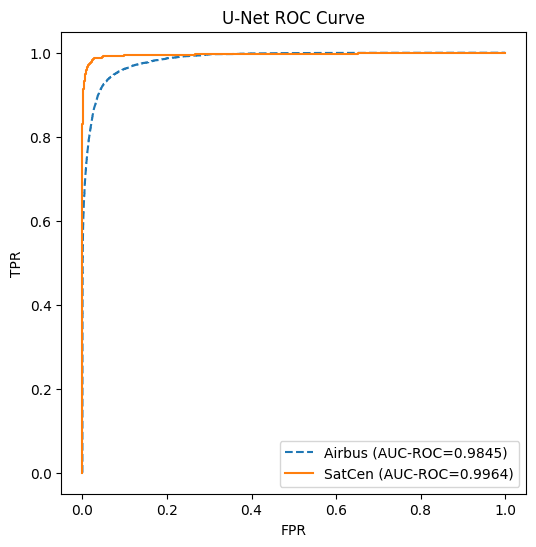

In [5]:
# set up the figure
plt.figure(figsize=(6, 6))

# compute data 
airbus_fprs, airbus_tprs, _ = roc_curve(airbus_y, airbus_z)
airbus_auc = auc(airbus_fprs, airbus_tprs)

satcen_fprs, satcen_tprs, _ = roc_curve(satcen_y, satcen_z)
satcen_auc = auc(satcen_fprs, satcen_tprs)

# plot data
plt.plot(airbus_fprs, airbus_tprs, label=f'Airbus (AUC-ROC={airbus_auc:.4f})', linestyle='dashed')
plt.plot(satcen_fprs, satcen_tprs, label=f'SatCen (AUC-ROC={satcen_auc:.4f})')

# set axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')

# set title
plt.title('U-Net ROC Curve')

# set the legend location
plt.legend(loc='lower right')

# show the plot
plt.show()

## PR Curve

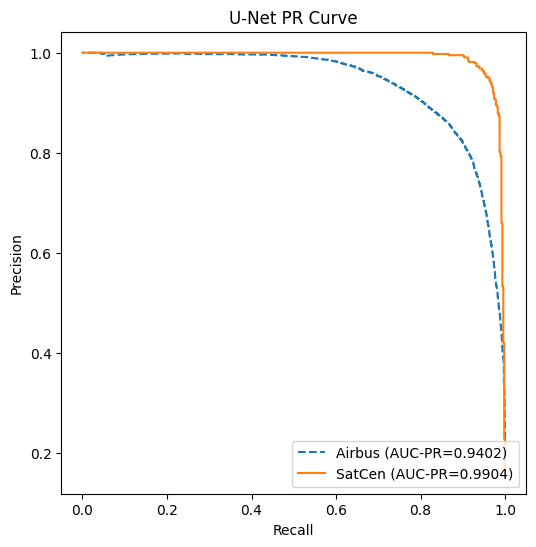

In [8]:
# set up the figure
plt.figure(figsize=(6, 6))

# compute data 
airbus_precisions, airbus_recalls, _ = precision_recall_curve(airbus_y, airbus_z)
airbus_auc = auc(airbus_recalls, airbus_precisions)

satcen_precisions, satcen_recalls, _ = precision_recall_curve(satcen_y, satcen_z)
satcen_auc = auc(satcen_recalls, satcen_precisions)

# plot data
plt.plot(airbus_recalls, airbus_precisions, label=f'Airbus (AUC-PR={airbus_auc:.4f})', linestyle='dashed')
plt.plot(satcen_recalls, satcen_precisions, label=f'SatCen (AUC-PR={satcen_auc:.4f})')

# set axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# set title
plt.title('U-Net PR Curve')

# set the legend location
plt.legend(loc='lower right')

# show the plot
plt.show()